In [62]:
# self defined Modules
from myModules.utils import merge
from myModules.plot.plotNetwork import Network

# General Modules
import pandas as pd
import warnings
import pickle
import numpy as np
from tqdm.notebook import tqdm

# nlp
from nltk import ConditionalFreqDist, bigrams

# visualization
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
from networkx.drawing.nx_pydot import graphviz_layout
import operator

warnings.filterwarnings('ignore')

In [63]:
DATA_ROOT = './processed-data/'

PERIOD_1 = DATA_ROOT + 'period-1/'
PERIOD_2 = DATA_ROOT + 'period-2/'
PERIOD_3 = DATA_ROOT + 'period-3/'

RESULT_ROOT = './Result/3구간/'

RESULT_1 = RESULT_ROOT + '/1시기/ST/'
RESULT_2 = RESULT_ROOT + '/2시기/ST/'
RESULT_3 = RESULT_ROOT + '/3시기/ST/'

In [64]:
with open(PERIOD_1+"lemmatized-all.pkl", "rb") as f:
    all_1 = pickle.load(f)
with open(PERIOD_1+"lemmatized-noun.pkl", "rb") as f:
    noun_1 = pickle.load(f)
with open(PERIOD_1+"lemmatized-verb.pkl", "rb") as f:
    verb_1 = pickle.load(f)
with open(PERIOD_1+"lemmatized-adjective.pkl", "rb") as f:
    adjective_1 = pickle.load(f)
with open(PERIOD_1+"lemmatized-adverb.pkl", "rb") as f:
    adverb_1 = pickle.load(f)


with open(PERIOD_2+"lemmatized-all.pkl", "rb") as f:
    all_2 = pickle.load(f)
with open(PERIOD_2+"lemmatized-noun.pkl", "rb") as f:
    noun_2 = pickle.load(f)
with open(PERIOD_2+"lemmatized-verb.pkl", "rb") as f:
    verb_2 = pickle.load(f)
with open(PERIOD_2+"lemmatized-adjective.pkl", "rb") as f:
    adjective_2 = pickle.load(f)
with open(PERIOD_2+"lemmatized-adverb.pkl", "rb") as f:
    adverb_2 = pickle.load(f)

with open(PERIOD_3+"lemmatized-all.pkl", "rb") as f:
    all_3 = pickle.load(f)
with open(PERIOD_3+"lemmatized-noun.pkl", "rb") as f:
    noun_3 = pickle.load(f)
with open(PERIOD_3+"lemmatized-verb.pkl", "rb") as f:
    verb_3 = pickle.load(f)
with open(PERIOD_3+"lemmatized-adjective.pkl", "rb") as f:
    adjective_3 = pickle.load(f)
with open(PERIOD_3+"lemmatized-adverb.pkl", "rb") as f:
    adverb_3 = pickle.load(f)

In [65]:
bgrams = [bigrams(x) for x in all_1]

token = []
for i in bgrams:
    token += ([x for x in i])

cfd = ConditionalFreqDist(token)

freq_matrix = []

for i in tqdm(cfd.keys()):
    temp = []
    for j in cfd.keys():
        temp.append(cfd[i][j])
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns=cfd.keys())

  0%|          | 0/6587 [00:00<?, ?it/s]

In [66]:
co_occurence_dict = {}

for idx in range(len(df)):
    co_occurence_dict[str(idx)] = df.iloc[idx, :].max()

In [67]:
sorted_dict = sorted(co_occurence_dict.items(), key = lambda item: item[1], reverse=True)
top_N = sorted_dict[:40]
top_N_list = []
for idx, _ in top_N:
    top_N_list.append(int(idx))
top_N_col_list = []


In [68]:
df.iloc[top_N_list, :]

,america,germany,ruin,occupation,army,struggle,bring,order,chaos,nazi,...,disarmament,context,despair,bluntness,sarcasm,gromyko,enlightenment,nimitz,distressed,harsh
red,0,0,0,1,76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
soviet,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
united,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
new,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
year,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
mr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
average,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
russian,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
concentration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
communist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
G = nx.from_pandas_adjacency(df.iloc[top_N_list, :])

In [70]:
# G = nx.from_pandas_adjacency(df[0:30][0:30])
dgr = nx.degree_centrality(G)
dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)

cls = nx.closeness_centrality(G)
cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

btw = nx.betweenness_centrality(G)
btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)

eig = nx.eigenvector_centrality(G)
eig = sorted(eig.items(), key=operator.itemgetter(1), reverse=True)

pgr = nx.pagerank(G)
pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

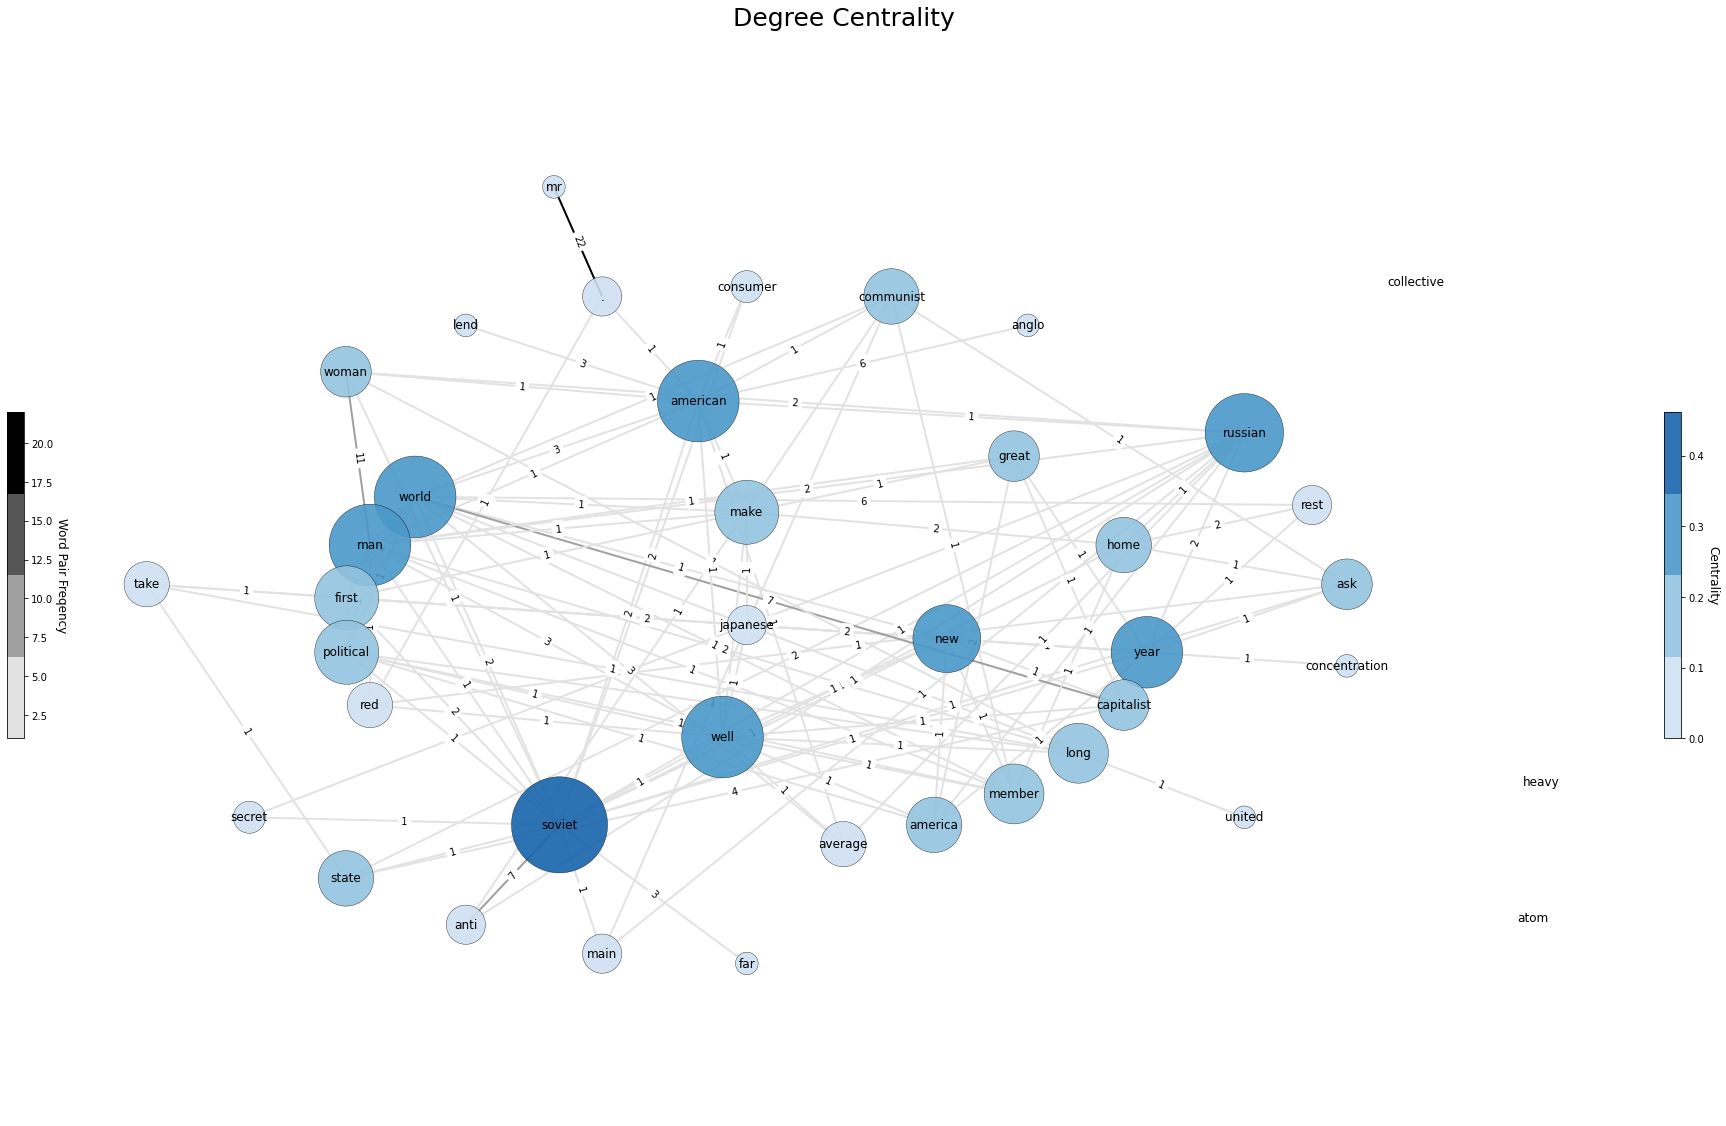

In [71]:
for token, centrality in dgr:
    G.nodes[token]['weight'] = centrality

fig = plt.figure(figsize=(30, 20))
plt.margins(x=0.1, y=0.2)
ax = fig.gca()

edge_labels = dict(((u, v), d["weight"]) for u, v, d in G.edges(data=True))
node_labels = dict((token, token) for token, _ in G.nodes(data=True))
pos = graphviz_layout(G, prog='twopi')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)

Blues_modified = cm.get_cmap('Blues', 256)
newcmp = ListedColormap(Blues_modified(np.linspace(0.2, 0.8, 4)))
nc = nx.draw_networkx_nodes(G, pos, 
    node_size=[node[1]["weight"]*20000 for node in G.nodes(data=True)],
    node_color=[node[1]['weight'] for node in G.nodes(data=True)], 
    cmap=newcmp, node_shape='o', alpha=0.9, linewidths=0.4, edgecolors='#000000')

Greys_modified = cm.get_cmap('Greys', 256)
newcmp = ListedColormap(Greys_modified(np.linspace(0.2, 1.0, 4)))
ec = nx.draw_networkx_edges(G, pos, 
    edge_color=[edge[2]['weight'] for edge in G.edges(data=True)],
    edge_cmap=newcmp, style='solid', width=2)

plt.title("Degree Centrality", fontsize=25)
plt.axis('off')

axins = inset_axes(ax,
            width='1%',
            height='30%',
            loc='center right',
            borderpad=0)
cbar = plt.colorbar(nc, cax=axins)
cbar.ax.set_ylabel('Centrality', rotation=270, fontsize=12, labelpad=15)

axins = inset_axes(ax,
    width='1%',
    height='30%',
    loc='center left',
    borderpad=0)
cbar = plt.colorbar(ec, cax=axins)
cbar.ax.set_ylabel('Word Pair Freqency', rotation=270, fontsize=12, labelpad=15)

plt.show()

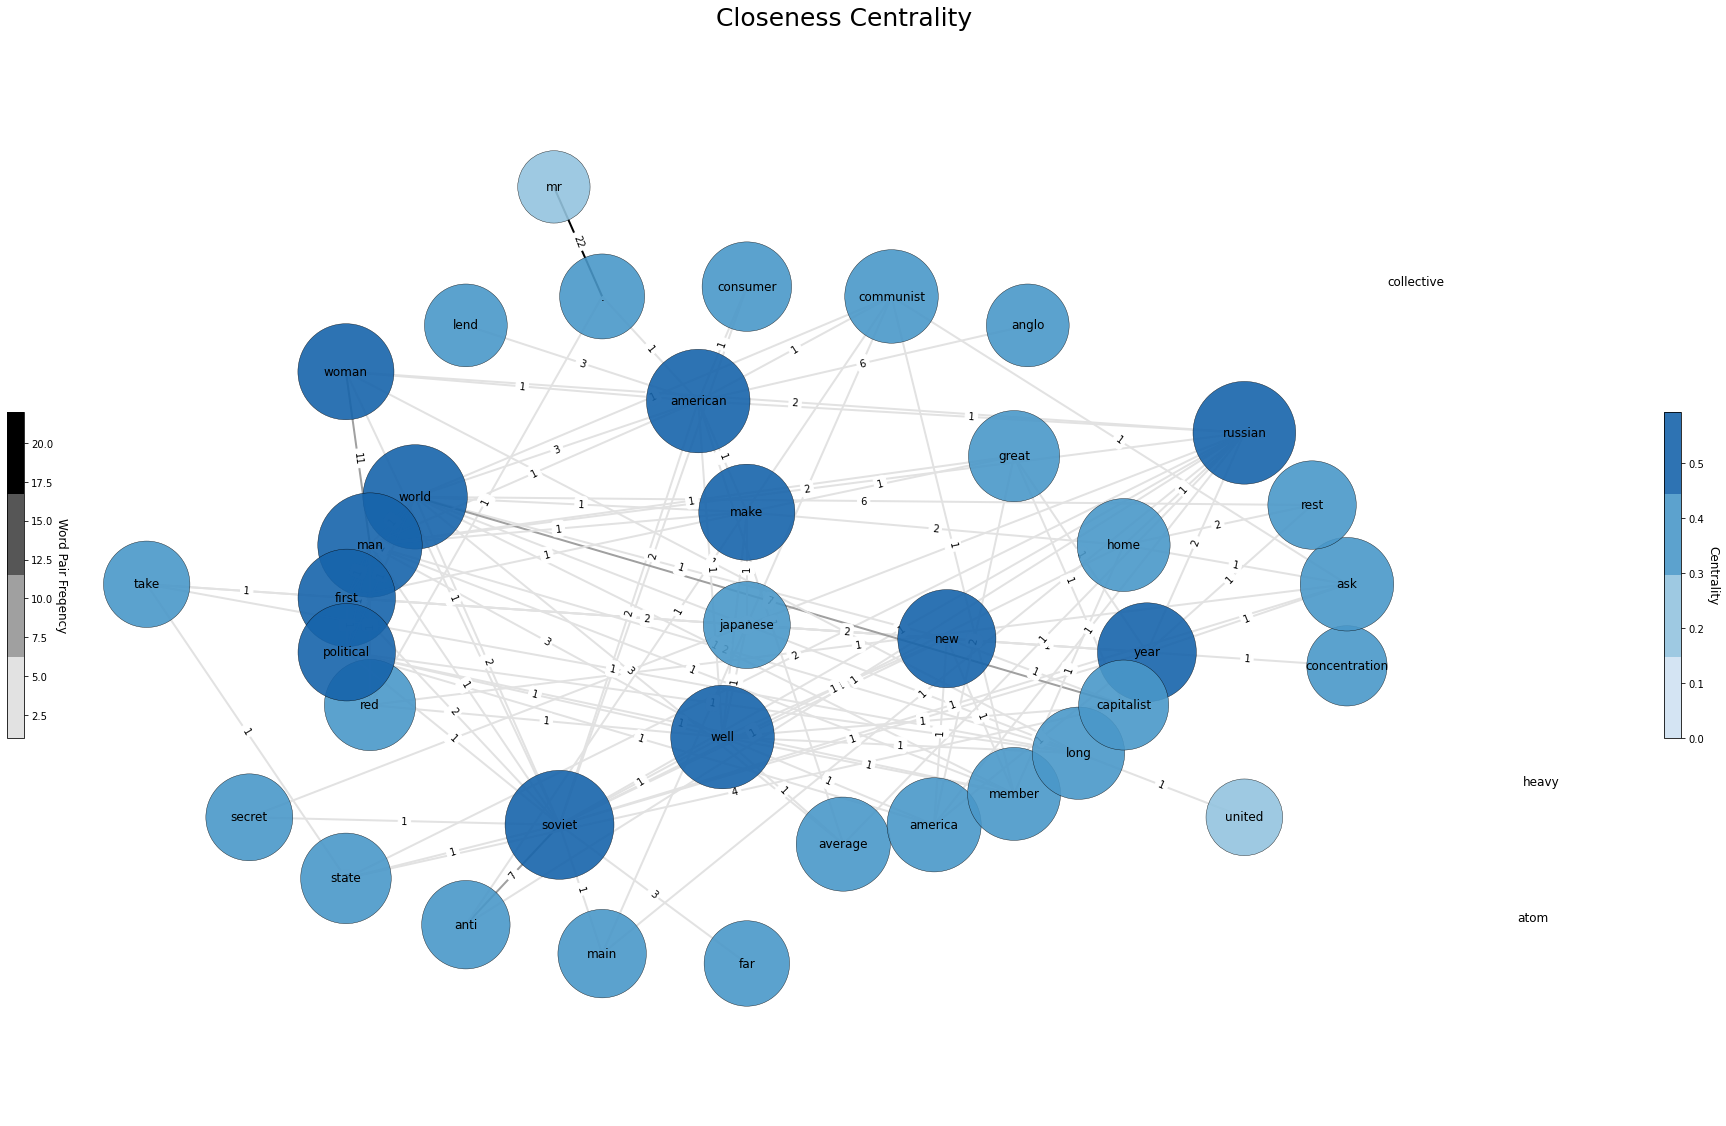

In [72]:
for token, centrality in cls:
    G.nodes[token]['weight'] = centrality

fig = plt.figure(figsize=(30, 20))
plt.margins(x=0.1, y=0.2)
ax = fig.gca()

edge_labels = dict(((u, v), d["weight"]) for u, v, d in G.edges(data=True))
node_labels = dict((token, token) for token, _ in G.nodes(data=True))
pos = graphviz_layout(G, prog='twopi')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)

Blues_modified = cm.get_cmap('Blues', 256)
newcmp = ListedColormap(Blues_modified(np.linspace(0.2, 0.8, 4)))
nc = nx.draw_networkx_nodes(G, pos, 
    node_size=[node[1]["weight"]*20000 for node in G.nodes(data=True)],
    node_color=[node[1]['weight'] for node in G.nodes(data=True)], 
    cmap=newcmp, node_shape='o', alpha=0.9, linewidths=0.4, edgecolors='#000000')

Greys_modified = cm.get_cmap('Greys', 256)
newcmp = ListedColormap(Greys_modified(np.linspace(0.2, 1.0, 4)))
ec = nx.draw_networkx_edges(G, pos, 
    edge_color=[edge[2]['weight'] for edge in G.edges(data=True)],
    edge_cmap=newcmp, style='solid', width=2)

plt.title("Closeness Centrality", fontsize=25)
plt.axis('off')

axins = inset_axes(ax,
            width='1%',
            height='30%',
            loc='center right',
            borderpad=0)
cbar = plt.colorbar(nc, cax=axins)
cbar.ax.set_ylabel('Centrality', rotation=270, fontsize=12, labelpad=15)

axins = inset_axes(ax,
    width='1%',
    height='30%',
    loc='center left',
    borderpad=0)
cbar = plt.colorbar(ec, cax=axins)
cbar.ax.set_ylabel('Word Pair Freqency', rotation=270, fontsize=12, labelpad=15)

plt.show()

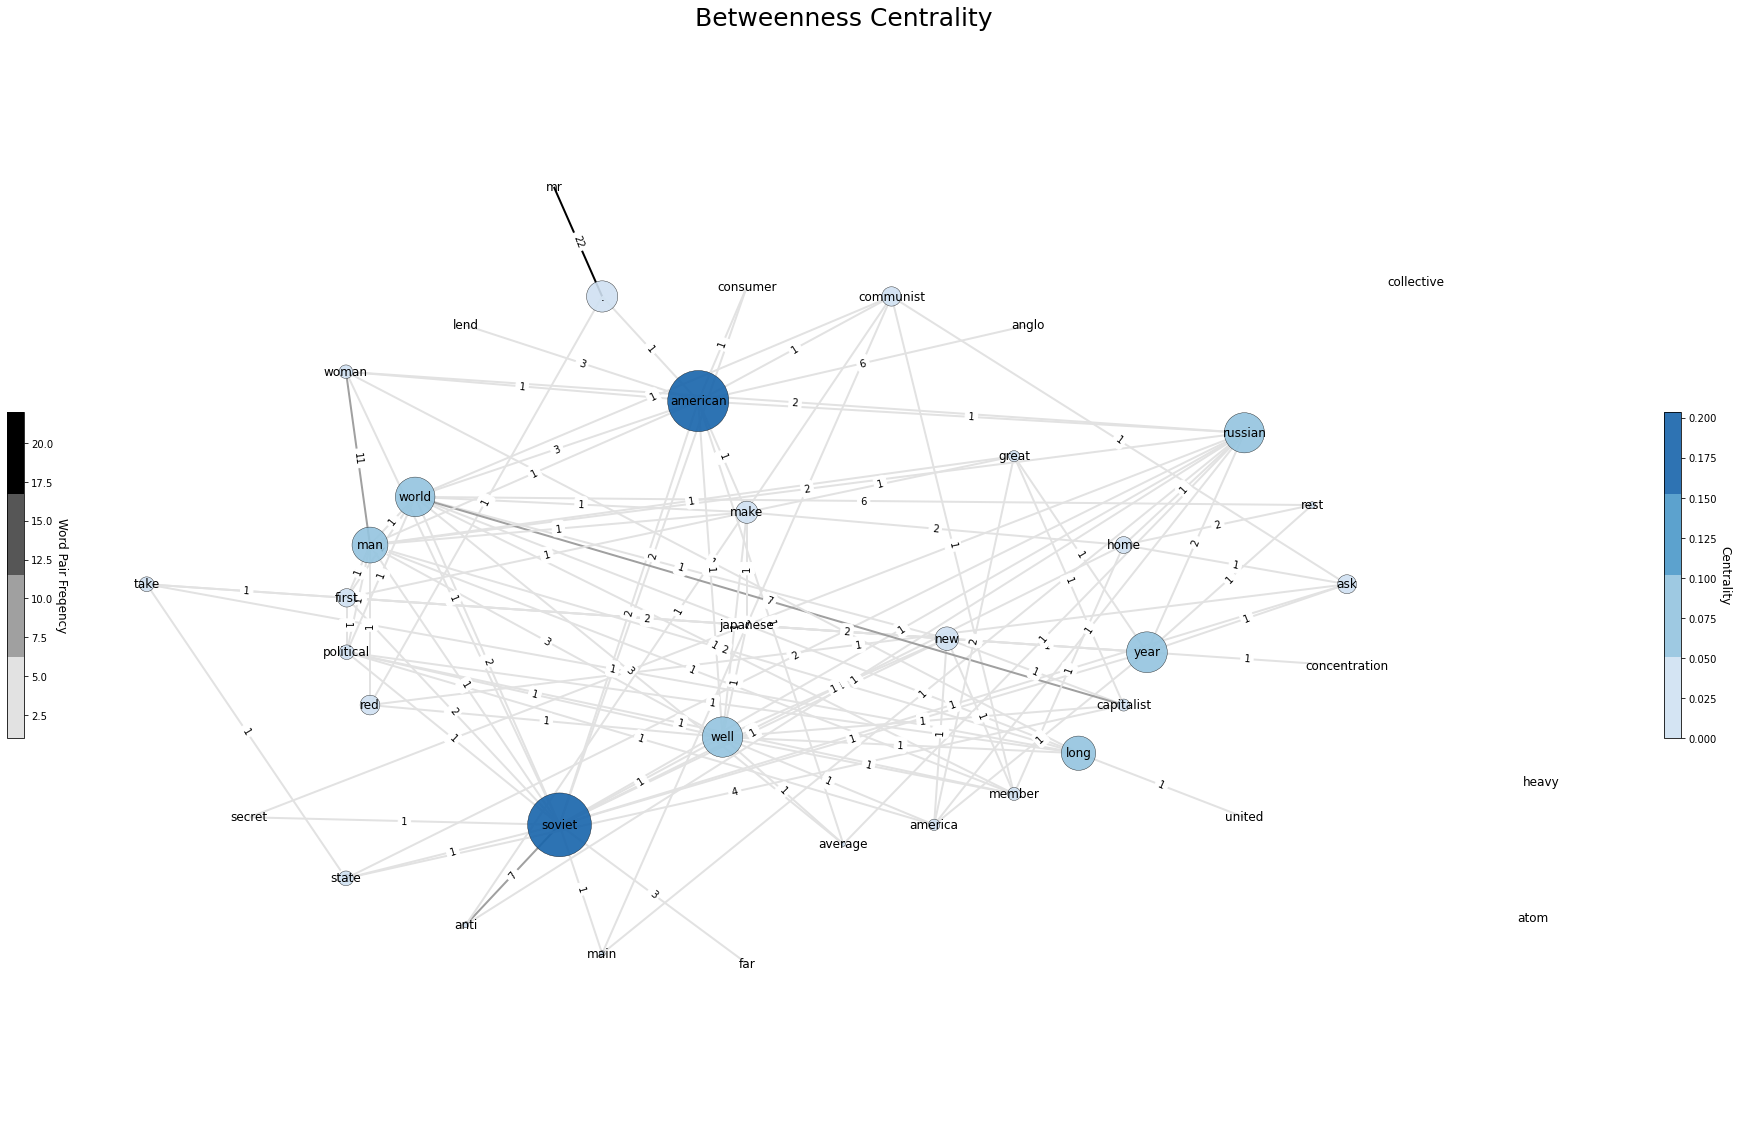

In [73]:
for token, centrality in btw:
    G.nodes[token]['weight'] = centrality

fig = plt.figure(figsize=(30, 20))
plt.margins(x=0.1, y=0.2)
ax = fig.gca()

edge_labels = dict(((u, v), d["weight"]) for u, v, d in G.edges(data=True))
node_labels = dict((token, token) for token, _ in G.nodes(data=True))
pos = graphviz_layout(G, prog='twopi')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)

Blues_modified = cm.get_cmap('Blues', 256)
newcmp = ListedColormap(Blues_modified(np.linspace(0.2, 0.8, 4)))
nc = nx.draw_networkx_nodes(G, pos, 
    node_size=[node[1]["weight"]*20000 for node in G.nodes(data=True)],
    node_color=[node[1]['weight'] for node in G.nodes(data=True)], 
    cmap=newcmp, node_shape='o', alpha=0.9, linewidths=0.4, edgecolors='#000000')

Greys_modified = cm.get_cmap('Greys', 256)
newcmp = ListedColormap(Greys_modified(np.linspace(0.2, 1.0, 4)))
ec = nx.draw_networkx_edges(G, pos, 
    edge_color=[edge[2]['weight'] for edge in G.edges(data=True)],
    edge_cmap=newcmp, style='solid', width=2)

plt.title("Betweenness Centrality", fontsize=25)
plt.axis('off')

axins = inset_axes(ax,
            width='1%',
            height='30%',
            loc='center right',
            borderpad=0)
cbar = plt.colorbar(nc, cax=axins)
cbar.ax.set_ylabel('Centrality', rotation=270, fontsize=12, labelpad=15)

axins = inset_axes(ax,
    width='1%',
    height='30%',
    loc='center left',
    borderpad=0)
cbar = plt.colorbar(ec, cax=axins)
cbar.ax.set_ylabel('Word Pair Freqency', rotation=270, fontsize=12, labelpad=15)

plt.show()

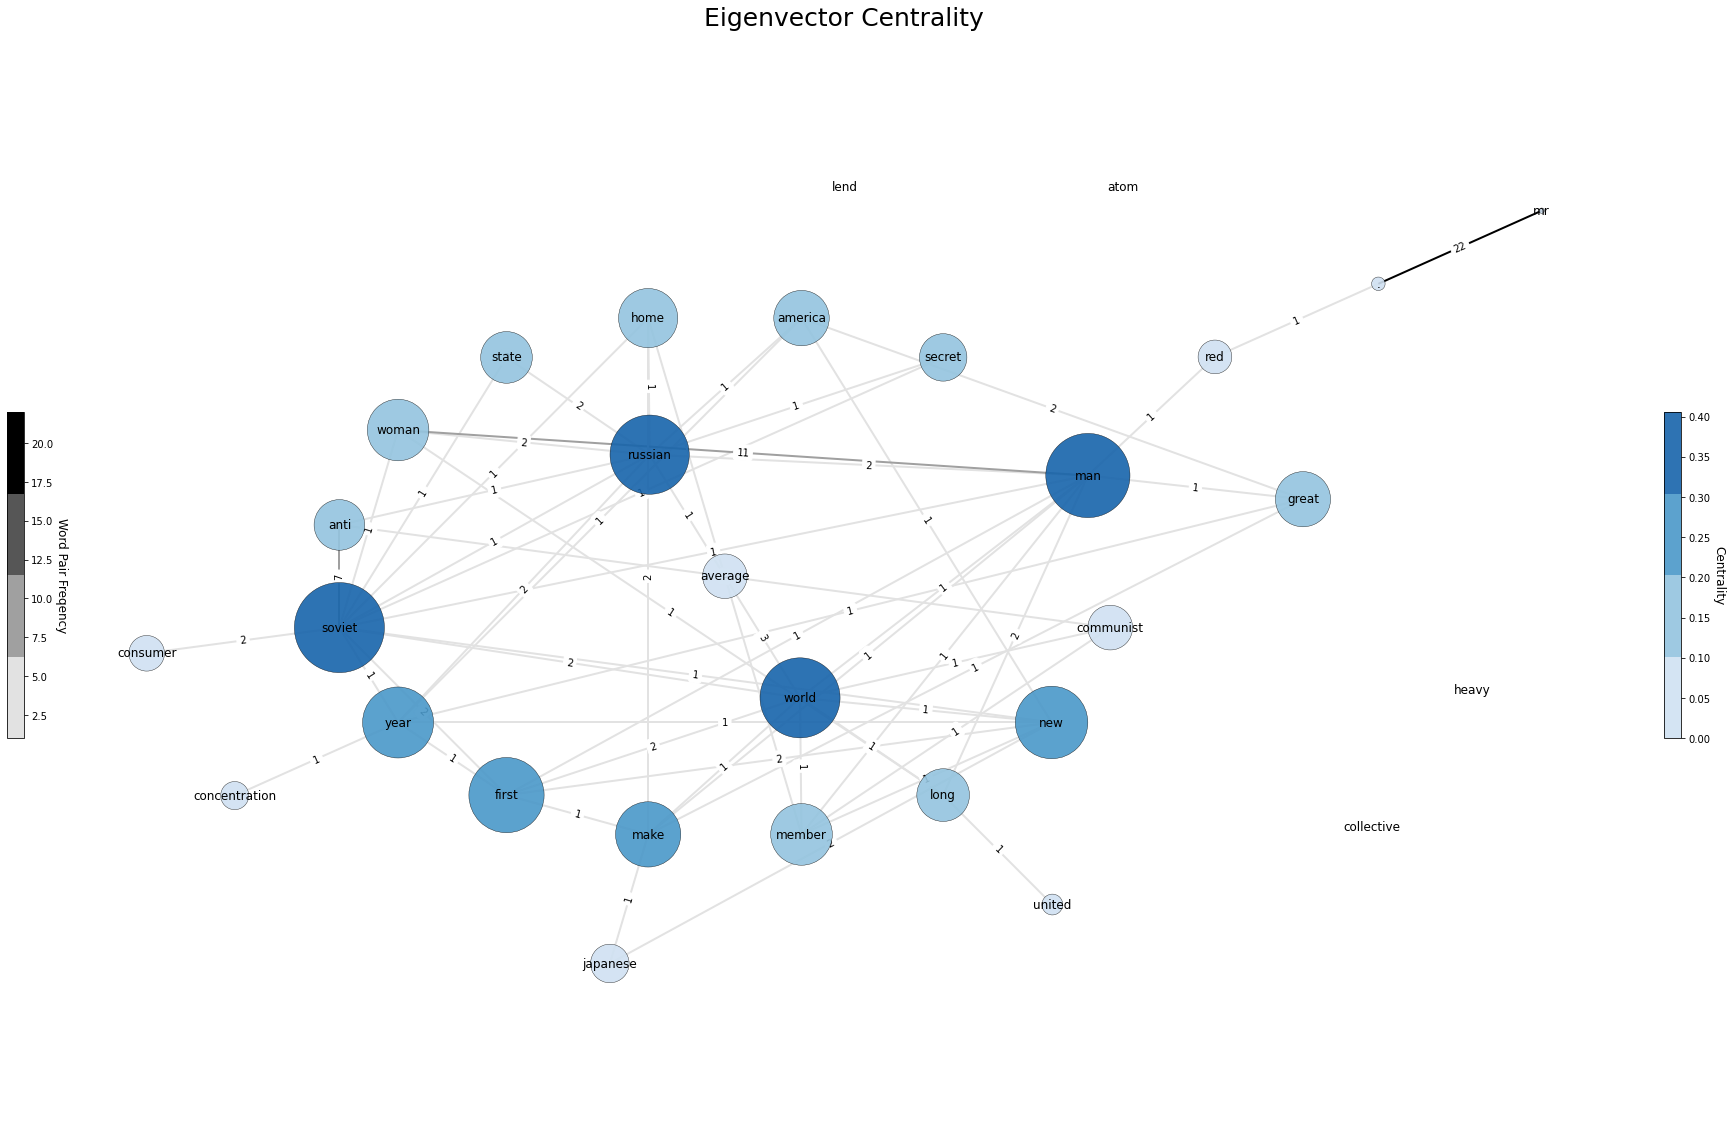

In [55]:
for token, centrality in eig:
    G.nodes[token]['weight'] = centrality

fig = plt.figure(figsize=(30, 20))
plt.margins(x=0.1, y=0.2)
ax = fig.gca()

edge_labels = dict(((u, v), d["weight"]) for u, v, d in G.edges(data=True))
node_labels = dict((token, token) for token, _ in G.nodes(data=True))
pos = graphviz_layout(G, prog='twopi')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)

Blues_modified = cm.get_cmap('Blues', 256)
newcmp = ListedColormap(Blues_modified(np.linspace(0.2, 0.8, 4)))
nc = nx.draw_networkx_nodes(G, pos, 
    node_size=[node[1]["weight"]*20000 for node in G.nodes(data=True)],
    node_color=[node[1]['weight'] for node in G.nodes(data=True)], 
    cmap=newcmp, node_shape='o', alpha=0.9, linewidths=0.4, edgecolors='#000000')

Greys_modified = cm.get_cmap('Greys', 256)
newcmp = ListedColormap(Greys_modified(np.linspace(0.2, 1.0, 4)))
ec = nx.draw_networkx_edges(G, pos, 
    edge_color=[edge[2]['weight'] for edge in G.edges(data=True)],
    edge_cmap=newcmp, style='solid', width=2)

plt.title("Eigenvector Centrality", fontsize=25)
plt.axis('off')

axins = inset_axes(ax,
            width='1%',
            height='30%',
            loc='center right',
            borderpad=0)
cbar = plt.colorbar(nc, cax=axins)
cbar.ax.set_ylabel('Centrality', rotation=270, fontsize=12, labelpad=15)

axins = inset_axes(ax,
    width='1%',
    height='30%',
    loc='center left',
    borderpad=0)
cbar = plt.colorbar(ec, cax=axins)
cbar.ax.set_ylabel('Word Pair Freqency', rotation=270, fontsize=12, labelpad=15)

plt.show()

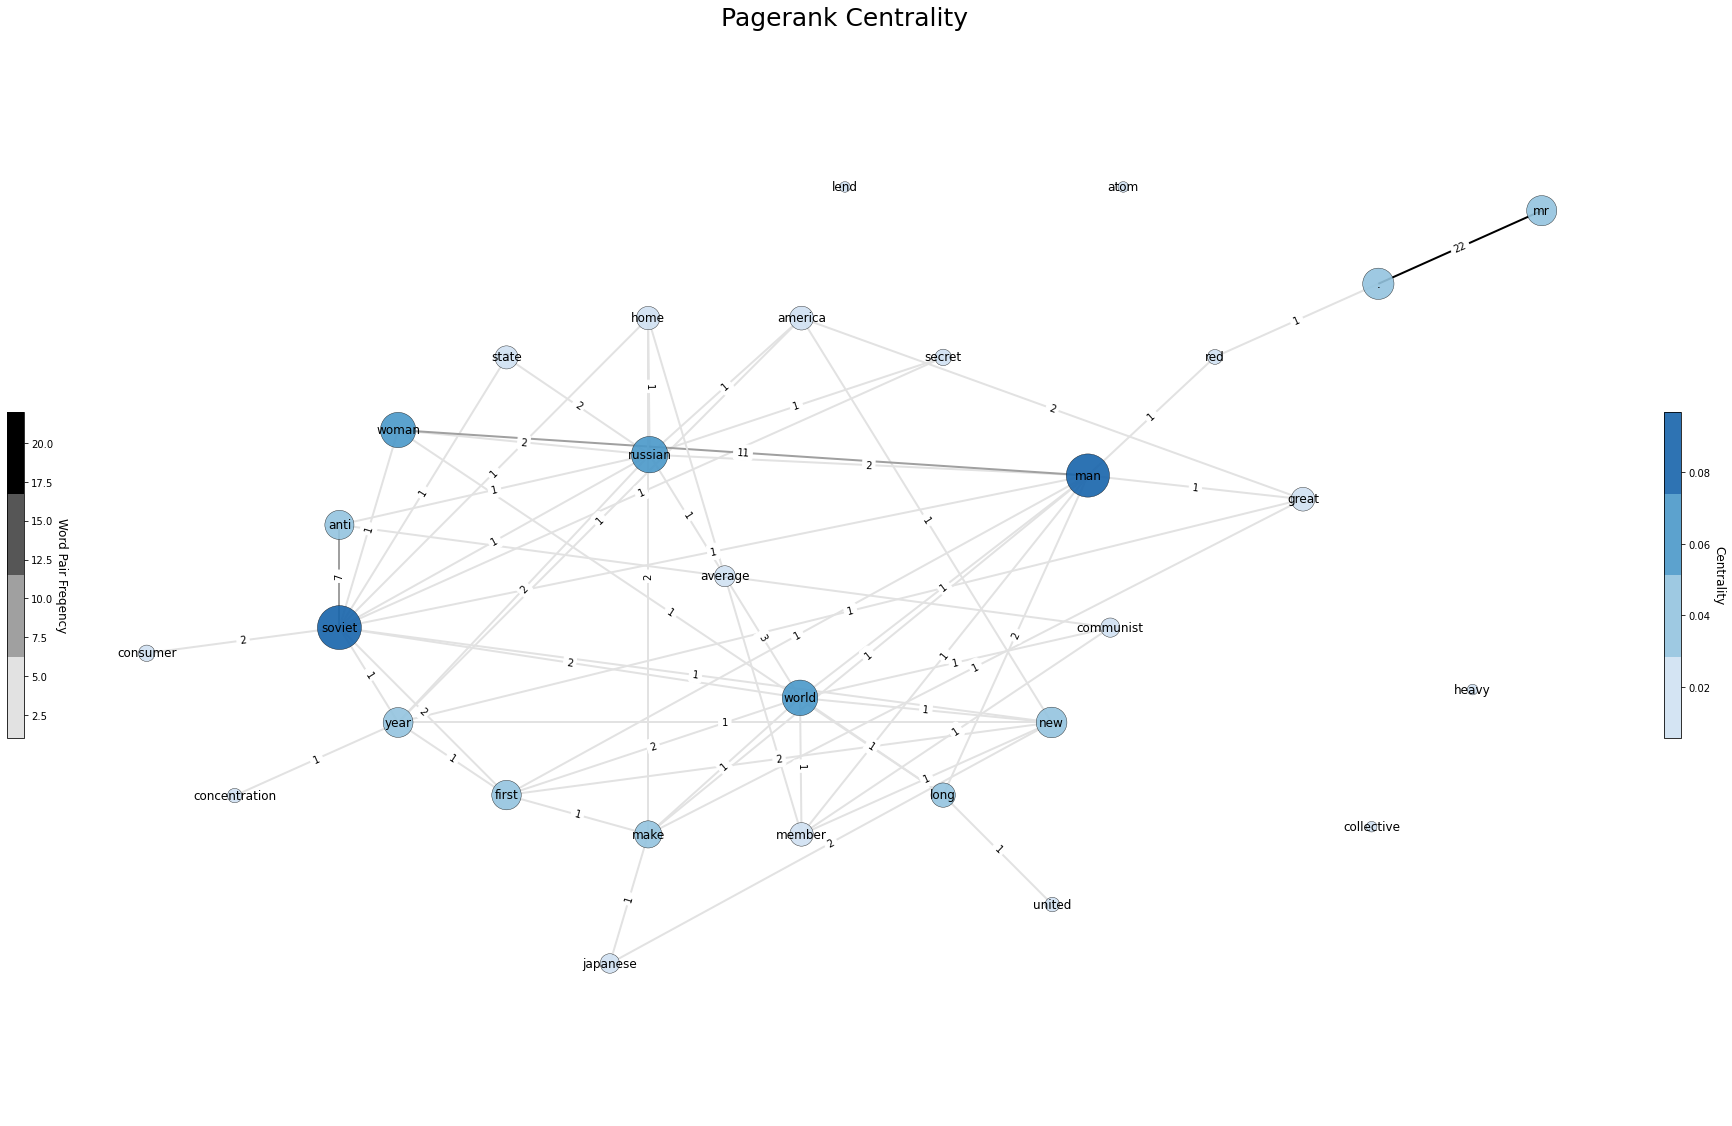

In [56]:
for token, centrality in pgr:
    G.nodes[token]['weight'] = centrality

fig = plt.figure(figsize=(30, 20))
plt.margins(x=0.1, y=0.2)
ax = fig.gca()

edge_labels = dict(((u, v), d["weight"]) for u, v, d in G.edges(data=True))
node_labels = dict((token, token) for token, _ in G.nodes(data=True))
pos = graphviz_layout(G, prog='twopi')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)

Blues_modified = cm.get_cmap('Blues', 256)
newcmp = ListedColormap(Blues_modified(np.linspace(0.2, 0.8, 4)))
nc = nx.draw_networkx_nodes(G, pos, 
    node_size=[node[1]["weight"]*20000 for node in G.nodes(data=True)],
    node_color=[node[1]['weight'] for node in G.nodes(data=True)], 
    cmap=newcmp, node_shape='o', alpha=0.9, linewidths=0.4, edgecolors='#000000')

Greys_modified = cm.get_cmap('Greys', 256)
newcmp = ListedColormap(Greys_modified(np.linspace(0.2, 1.0, 4)))
ec = nx.draw_networkx_edges(G, pos, 
    edge_color=[edge[2]['weight'] for edge in G.edges(data=True)],
    edge_cmap=newcmp, style='solid', width=2)

plt.title("Pagerank Centrality", fontsize=25)
plt.axis('off')

axins = inset_axes(ax,
            width='1%',
            height='30%',
            loc='center right',
            borderpad=0)
cbar = plt.colorbar(nc, cax=axins)
cbar.ax.set_ylabel('Centrality', rotation=270, fontsize=12, labelpad=15)

axins = inset_axes(ax,
    width='1%',
    height='30%',
    loc='center left',
    borderpad=0)
cbar = plt.colorbar(ec, cax=axins)
cbar.ax.set_ylabel('Word Pair Freqency', rotation=270, fontsize=12, labelpad=15)

plt.show()